In [13]:
# Install Python Packages
!pip install sklearn
!pip install matplotlib
!pip install seaborn
!pip install numpy

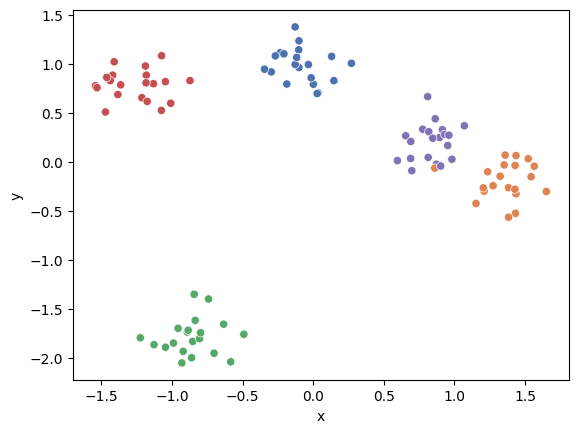

In [1]:
# Plotting the data
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
centers = 5
X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

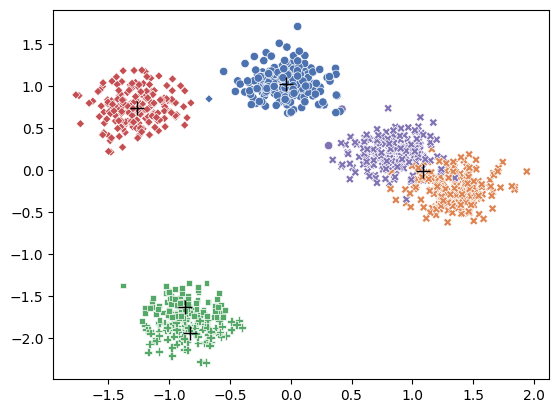

In [ ]:
# K-Means++ using Sklearn
# Used from https://towardsdatascience.com/create-your-own-k-means-clustering-algorithm-in-python-d7d4c9077670
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import make_blobs
import seaborn as sns
import random
def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))
class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    def fit(self, X_train):        # Initialize the centroids, using the "k-means++" method, where a random datapoint is selected as the first,
        # then the rest are initialized w/ probabilities proportional to their distances to the first
        # Pick a random point from train data for first centroid
        self.centroids = [random.choice(X_train)]
        for _ in range(self.n_clusters-1):
            # Calculate distances from points to the centroids
            dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
            # Normalize the distances
            dists /= np.sum(dists)
            # Choose remaining points based on their distances
            new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx]]        
            # This initial method of randomly selecting centroid starts is less effective
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
            iteration += 1
    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs
# Create a dataset of 2D distributions
centers = 5
X_train, true_labels = make_blobs(n_samples=1000,centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train) # Fit centroids to dataset
kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)
# View results
class_centers, classification = kmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         'k+',
         markersize=10,
         )
plt.show()

5
{0, 1, 2, 3, 4}
[ 1  2  3  4  5  6  7  8  9 10]
6000.0
4401.0
3008.0
4286.0
3661.0
6979.0
10299.0
7887.0
12926.0
17857.0


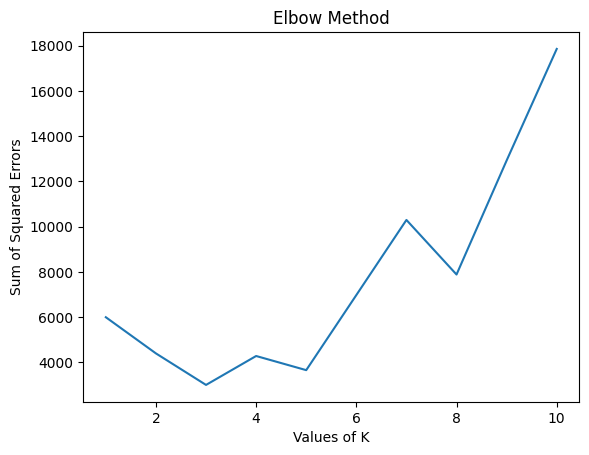

In [23]:
# X_train, true_labels = make_blobs(n_samples=1000,centers=centers, random_state=42)
X_train, true_labels = make_blobs(n_samples=1000,centers=centers, random_state=42)
print(len(set(true_labels)))
print(set(true_labels))
X_train = StandardScaler().fit_transform(X_train) # Fit centroids to dataset
k_values = np.arange(1, 11)
print(k_values)
sse_values = np.zeros(10)
for i in k_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_train)
    # View results
    class_centers, classification = kmeans.evaluate(X_train)
    sse_values[i - 1] = np.sum((true_labels - classification) ** 2)
    print(sse_values[i - 1])
plt.plot(k_values, sse_values)
plt.xlabel("Values of K")
plt.ylabel("Sum of Squared Errors")
plt.title("Elbow Method")
plt.show()

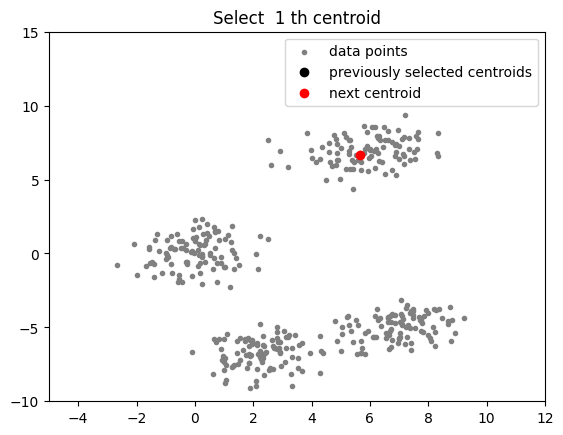

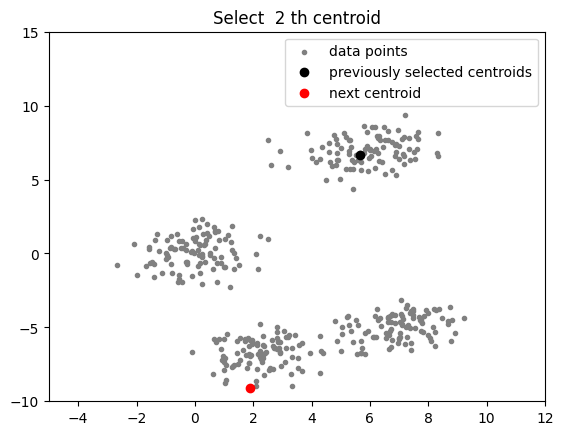

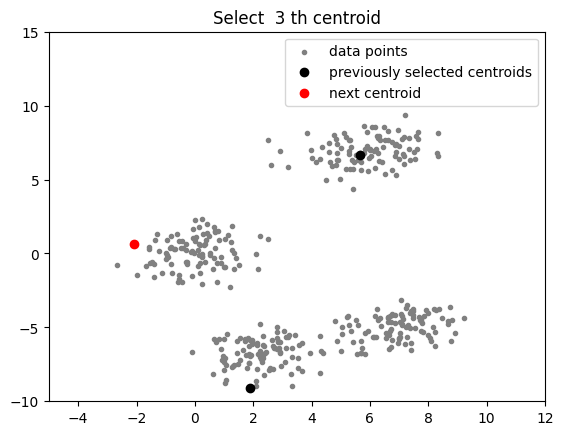

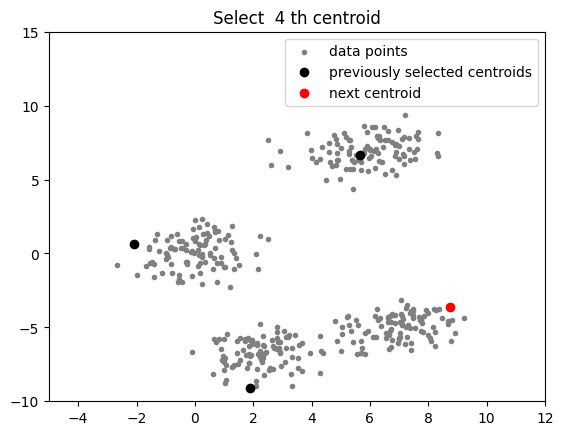

In [24]:
# K-Means++ from Scratch
# Used from https://www.geeksforgeeks.org/ml-k-means-algorithm/
# importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

# creating data
mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1, 0.3], [0.3, 1]])
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 100)

mean_02 = np.array([6.0, 7.0])
cov_02 = np.array([[1.5, 0.3], [0.3, 1]])
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 100)

mean_03 = np.array([7.0, -5.0])
cov_03 = np.array([[1.2, 0.5], 
                   [0.5, 1]]) 
dist_03 = np.random.multivariate_normal(mean_03, cov_01, 100)

mean_04 = np.array([2.0, -7.0])
cov_04 = np.array([[1.2, 0.5], [0.5, 1.3]])
dist_04 = np.random.multivariate_normal(mean_04, cov_01, 100)

data = np.vstack((dist_01, dist_02, dist_03, dist_04))
np.random.shuffle(data)

# function to plot the selected centroids


def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker='.',
                color='gray', label='data points')
    plt.scatter(centroids[:-1, 0], centroids[:-1, 1],
                color='black', label='previously selected centroids')
    plt.scatter(centroids[-1, 0], centroids[-1, 1],
                color='red', label='next centroid')
    plt.title('Select % d th centroid' % (centroids.shape[0]))

    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()

# function to compute euclidean distance
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

# initialization algorithm
def initialize(data, k):
    '''
    initialized the centroids for K-means++
    inputs:
        data - numpy array of data points having shape (200, 2)
        k - number of clusters 
    '''
    # initialize the centroids list and add
    # a randomly selected data point to the list
    centroids = []
    centroids.append(data[np.random.randint(
        data.shape[0]), :])
    plot(data, np.array(centroids))

    # compute remaining k - 1 centroids
    for c_id in range(k - 1):

        # initialize a list to store distances of data
        # points from nearest centroid
        dist = []
        for i in range(data.shape[0]):
            point = data[i, :]
            d = sys.maxsize

            # compute distance of 'point' from each of the previously
            # selected centroid and store the minimum distance
            for j in range(len(centroids)):
                temp_dist = distance(point, centroids[j])
                d = min(d, temp_dist)
            dist.append(d)

        # select data point with maximum distance as our next centroid
        dist = np.array(dist)
        next_centroid = data[np.argmax(dist), :]
        centroids.append(next_centroid)
        dist = []
        plot(data, np.array(centroids))
    return centroids


# call the initialize function to get the centroids
centroids = initialize(data, k=4)

In [25]:
# PCA example on Iris
# from https://builtin.com/machine-learning/pca-in-python
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [26]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [27]:
# Projection into 2-D with 2 principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [28]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

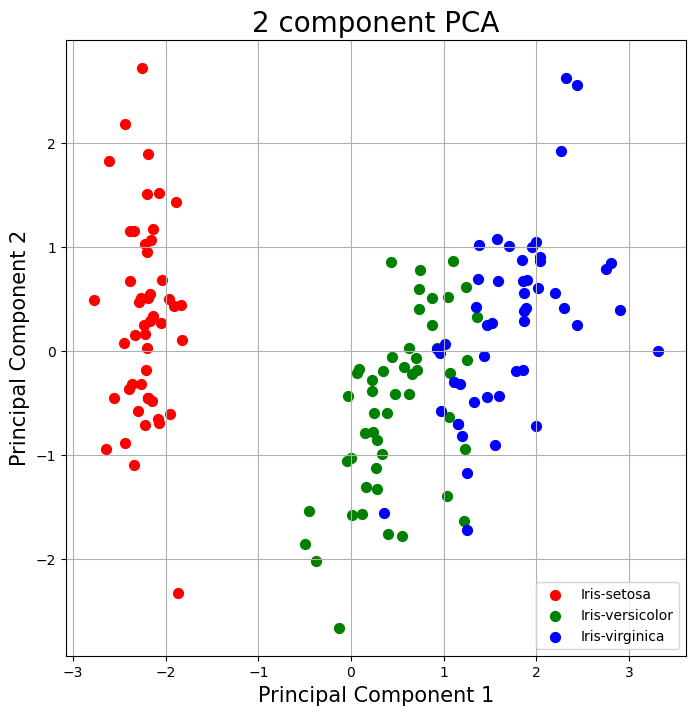

In [29]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [30]:
# Explained variance
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

27


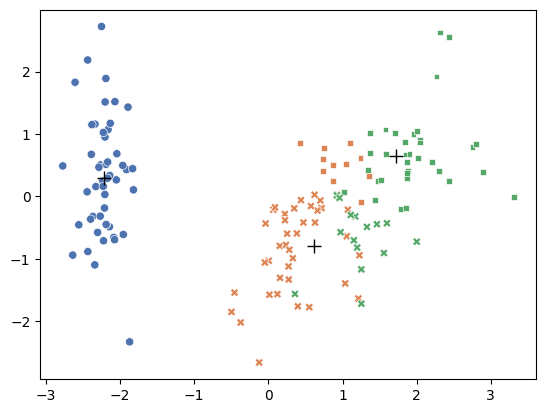

In [52]:
# K-Means on Iris data with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(principalDf.values)
# View results
class_centers, classification = kmeans.evaluate(principalDf.values)
X = principalDf.values[:, 0]
Y = principalDf.values[:, 1]
true_labels = df[['target']].values.reshape(Y.shape[0],)
dict_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
true_labels_index = np.array([dict_mapping[true_label] for true_label in true_labels])
print(np.sum((true_labels_index - classification) ** 2))
sns.scatterplot(x=X,
                y=Y,
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         'k+',
         markersize=10,
         )
plt.show()